In [2]:
import pnadium

pnadium.trimestral.download(2024, 4)

Iniciou o download: Trimestre 4/2024 - aguarde.
Download finalizado.
Iniciou a criação do DataFrame Pandas: esta etapa pode demorar alguns minutos.
Chunks processados e salvos.
DataFrame criado.
DataFrame "pnad_trimestral_trimestre_042024.parquet" salvo como arquivo Parquet em: /home/godofthemast/Meus_Scripts/insper/cdados/exercicios/analisedadosPNADcont/pnad_trimestral_trimestre_042024.parquet


In [1]:
import pandas as pd

dados = pd.read_parquet('pnad_trimestral_trimestre_042024.parquet')
dados.head()


,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200,COD_FAM,COD_PESSOA
0,2024,4,11,11.0,NaN,110000016,1110011,02,11,4,...,957.197334,0.0,778.285822,0.0,256.600053,0.0,0.0,283.755315,1100000160211,110000016021101
1,2024,4,11,11.0,NaN,110000016,1110011,02,11,4,...,957.197334,0.0,778.285822,0.0,256.600053,0.0,0.0,283.755315,1100000160211,110000016021102
2,2024,4,11,11.0,NaN,110000016,1110011,03,11,4,...,764.380448,0.0,622.196312,0.0,210.777094,0.0,0.0,214.602823,1100000160311,110000016031101
3,2024,4,11,11.0,NaN,110000016,1110011,03,11,4,...,764.380448,0.0,622.196312,0.0,210.777094,0.0,0.0,214.602823,1100000160311,110000016031102
4,2024,4,11,11.0,NaN,110000016,1110011,03,11,4,...,764.380448,0.0,622.196312,0.0,210.777094,0.0,0.0,214.602823,1100000160311,110000016031103


# Função de bootstrap

In [3]:
import numpy as np
def bootstrap_ci(df, col, weight_col, n_bootstrap=1000, alpha=0.05):
    """Calcula estatística (média ou proporção ponderada) e intervalo de confiança usando
    bootstrap.

    Parâmetros:
    ----------
    df : DataFrame
    DataFrame contendo os dados
    col : str
    Nome da coluna com a variável numérica (pode ser 0/1 ou contínua)
    weight_col : str
    Nome da coluna contendo os pesos amostrais
    n_bootstrap : int, opcional
    Número de amostras bootstrap (padrão: 1000)
    alpha : float, opcional
    Nível de significância (padrão: 0.05 para IC de 95%)

    Retorna:
    -------
    float, tuple
    Estatística ponderada original e tupla com limites inferior e superior do IC"""

    # Estatística original (proporção ou média ponderada)
    stat_original = np.average(df[col], weights=df[weight_col])

    # Estimativas bootstrap
    estimates = []

    for _ in range(n_bootstrap):
        sample = df.sample(frac=1, replace=True)
        stat = np.average(sample[col], weights=sample[weight_col])
        estimates.append(stat)

    # Intervalo de confiança
    lower = np.percentile(estimates, 100 * alpha / 2)
    upper = np.percentile(estimates, 100 * (1- alpha / 2))

    return stat_original, (lower, upper)

# Análise #1

In [4]:
dados_filtrados_uf = dados[dados['UF'].isin([31, 33, 35])]
dados_filtrados_uf

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200,COD_FAM,COD_PESSOA,id_domicilio
220591,2024,4,31,NaN,NaN,310000691,3154012,01,12,2,...,521.305929,533.280451,0.0,534.513587,0.000000,1048.622182,0.000000,3100006910112,310000691011201,3100006910112
220592,2024,4,31,NaN,NaN,310000691,3154012,01,12,2,...,521.305929,533.280451,0.0,534.513587,0.000000,1048.622182,0.000000,3100006910112,310000691011202,3100006910112
220593,2024,4,31,NaN,NaN,310000691,3154012,02,12,2,...,506.630752,521.018160,0.0,539.969743,0.000000,1019.053679,0.000000,3100006910212,310000691021201,3100006910212
220594,2024,4,31,NaN,NaN,310000691,3154012,02,12,2,...,506.630752,521.018160,0.0,539.969743,0.000000,1019.053679,0.000000,3100006910212,310000691021202,3100006910212
220595,2024,4,31,NaN,NaN,310000691,3154012,03,12,2,...,790.151233,770.818138,0.0,795.620398,0.000000,1461.891399,0.000000,3100006910312,310000691031201,3100006910312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342703,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121201,3515412701212
342704,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121202,3515412701212
342705,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121203,3515412701212
342706,2024,4,35,NaN,35.0,351541270,3521020,13,12,1,...,94.148000,434.673790,0.0,178.881263,99.275590,295.126315,302.600324,3515412701312,351541270131201,3515412701312


In [5]:
d1 = dados_filtrados_uf[dados_filtrados_uf["VD4002"] == 1]
dataframe_filtrado = d1[d1["VD4020"] > 0]
dataframe_filtrado

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200,COD_FAM,COD_PESSOA,id_domicilio
220593,2024,4,31,NaN,NaN,310000691,3154012,02,12,2,...,506.630752,521.018160,0.0,539.969743,0.000000,1019.053679,0.000000,3100006910212,310000691021201,3100006910212
220594,2024,4,31,NaN,NaN,310000691,3154012,02,12,2,...,506.630752,521.018160,0.0,539.969743,0.000000,1019.053679,0.000000,3100006910212,310000691021202,3100006910212
220595,2024,4,31,NaN,NaN,310000691,3154012,03,12,2,...,790.151233,770.818138,0.0,795.620398,0.000000,1461.891399,0.000000,3100006910312,310000691031201,3100006910312
220604,2024,4,31,NaN,NaN,310000691,3154012,06,12,2,...,520.921578,543.491445,0.0,533.736260,0.000000,1037.170597,0.000000,3100006910612,310000691061202,3100006910612
220605,2024,4,31,NaN,NaN,310000691,3154012,06,12,2,...,520.921578,543.491445,0.0,533.736260,0.000000,1037.170597,0.000000,3100006910612,310000691061203,3100006910612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342692,2024,4,35,NaN,35.0,351541270,3521020,05,12,1,...,127.658789,556.919274,0.0,254.113039,142.786956,391.054378,398.982414,3515412700512,351541270051204,3515412700512
342696,2024,4,35,NaN,35.0,351541270,3521020,09,12,1,...,113.186946,499.117677,0.0,226.975812,120.900494,360.165512,348.934942,3515412700912,351541270091201,3515412700912
342701,2024,4,35,NaN,35.0,351541270,3521020,11,12,1,...,108.198595,448.390444,0.0,201.813041,117.494439,322.273665,331.563860,3515412701112,351541270111201,3515412701112
342702,2024,4,35,NaN,35.0,351541270,3521020,11,12,1,...,108.198595,448.390444,0.0,201.813041,117.494439,322.273665,331.563860,3515412701112,351541270111202,3515412701112


In [6]:
media_ponderada, intervalo_confianca = bootstrap_ci(dataframe_filtrado, 'VD4020', 'V1028', 200)
print(f"Média ponderada: {media_ponderada:.2f}")
print(f"Intervalo de confiança: ({intervalo_confianca[0]:.2f}, {intervalo_confianca[1]:.2f})")

Média ponderada: 3963.87
Intervalo de confiança: (3895.73, 4036.59)


In [7]:
df_filtrado_homens = dataframe_filtrado[dataframe_filtrado["V2007"] == 1]
df_filtrado_mulheres = dataframe_filtrado[dataframe_filtrado["V2007"] == 2]

media_ponderada_homens, intervalo_confianca_homens = bootstrap_ci(df_filtrado_homens, 'VD4020', 'V1028', 200)
media_ponderada_mulheres, intervalo_confianca_mulheres = bootstrap_ci(df_filtrado_mulheres, 'VD4020', 'V1028', 200)

print(f"Média ponderada homens: {media_ponderada_homens}")
print(f"Intervalo de confiança homens: ({intervalo_confianca_homens[0]}, {intervalo_confianca_homens[1]})")
print("\n")
print(f"Média ponderada mulheres: {media_ponderada_mulheres}")
print(f"Intervalo de confiança mulheres: ({intervalo_confianca_mulheres[0]}, {intervalo_confianca_mulheres[1]})")

Média ponderada homens: 4417.856602755259
Intervalo de confiança homens: (4330.731764179564, 4505.62435030556)


Média ponderada mulheres: 3389.5826170036617
Intervalo de confiança mulheres: (3314.6771746982045, 3467.0475712456737)


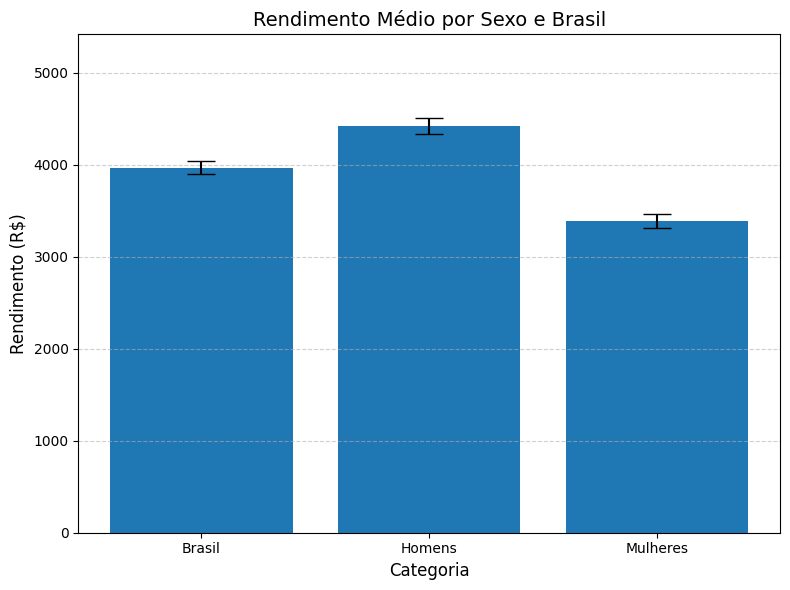

In [8]:
import matplotlib.pyplot as plt

categorias = ['Brasil', 'Homens', 'Mulheres']


rendimentos = [
    media_ponderada, 
    media_ponderada_homens, 
    media_ponderada_mulheres
]


ic_baixo = [
            media_ponderada - intervalo_confianca[0], 
            media_ponderada_homens - intervalo_confianca_homens[0], 
            media_ponderada_mulheres - intervalo_confianca_mulheres[0]
]


ic_cima = [
    intervalo_confianca[1] - media_ponderada, 
    intervalo_confianca_homens[1] - media_ponderada_homens, 
    intervalo_confianca_mulheres[1] - media_ponderada_mulheres
]


plt.figure(figsize=(8, 6))
plt.bar(categorias, rendimentos, yerr=[ic_baixo, ic_cima], capsize=10)

plt.title('Rendimento Médio por Sexo e Brasil', fontsize=14)
plt.ylabel('Rendimento (R$)', fontsize=12)
plt.xlabel('Categoria', fontsize=12)
plt.ylim(0, max(rendimentos) + 1000)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [10]:
dataframe_filtrado2 = dados_filtrados_uf[dados_filtrados_uf["V2009"] >= 14]
dataframe_filtrado2

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200,COD_FAM,COD_PESSOA
220591,2024,4,31,NaN,NaN,310000691,3154012,01,12,2,...,0.000000,521.305929,533.280451,0.0,534.513587,0.000000,1048.622182,0.000000,3100006910112,310000691011201
220592,2024,4,31,NaN,NaN,310000691,3154012,01,12,2,...,0.000000,521.305929,533.280451,0.0,534.513587,0.000000,1048.622182,0.000000,3100006910112,310000691011202
220593,2024,4,31,NaN,NaN,310000691,3154012,02,12,2,...,0.000000,506.630752,521.018160,0.0,539.969743,0.000000,1019.053679,0.000000,3100006910212,310000691021201
220594,2024,4,31,NaN,NaN,310000691,3154012,02,12,2,...,0.000000,506.630752,521.018160,0.0,539.969743,0.000000,1019.053679,0.000000,3100006910212,310000691021202
220595,2024,4,31,NaN,NaN,310000691,3154012,03,12,2,...,0.000000,790.151233,770.818138,0.0,795.620398,0.000000,1461.891399,0.000000,3100006910312,310000691031201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342703,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,105.146525,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121201
342704,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,105.146525,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121202
342705,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,105.146525,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121203
342706,2024,4,35,NaN,35.0,351541270,3521020,13,12,1,...,96.790617,94.148000,434.673790,0.0,178.881263,99.275590,295.126315,302.600324,3515412701312,351541270131201


In [11]:
dataframe_filtrado2 = dataframe_filtrado2.copy()

# Crie uma variável binária ’forca_trabalho’ que identifica pessoas ocupadas ou desocupadas
dataframe_filtrado2["forca_trabalho"] = dataframe_filtrado2["VD4002"].isin([1, 2]).astype(int)

# Crie uma variável binária ’desocupado’ que identifica apenas pessoas desocupadas (VD4002=2)
dataframe_filtrado2["desocupado"] = (dataframe_filtrado2["VD4002"] == 2).astype(int)

forca_trabalho = dataframe_filtrado2[dataframe_filtrado2["forca_trabalho"] == 1]

forca_trabalho_sp = forca_trabalho[forca_trabalho["UF"] == 33]
forca_trabalho_rj = forca_trabalho[forca_trabalho["UF"] == 35]
forca_trabalho_mg = forca_trabalho[forca_trabalho["UF"] == 31]

In [12]:
descupados_sp_bootstrap, intervalo_conf_sp = bootstrap_ci(forca_trabalho_sp, 'desocupado', 'V1028', 200)
descupados_rj_bootstrap, intervalo_conf_rj = bootstrap_ci(forca_trabalho_rj, 'desocupado', 'V1028', 200)
descupados_mg_bootstrap, intervalo_conf_mg = bootstrap_ci(forca_trabalho_mg, 'desocupado', 'V1028', 200)

print(f"Média SP com bootstrap: {descupados_sp_bootstrap*100}")
print(f"Intervalo de confiança SP: {intervalo_conf_sp[0]*100}, {intervalo_conf_sp[1]*100}")
print("\n")
print(f"Média RJ com bootstrap: {descupados_rj_bootstrap*100}")
print(f"Intervalo de confiança RJ: {intervalo_conf_rj[0]*100}, {intervalo_conf_rj[1]*100}")
print("\n")
print(f"Média MG com bootstrap: {descupados_mg_bootstrap*100}")
print(f"Intervalo de confiança MG: {intervalo_conf_mg[0]*100}, {intervalo_conf_mg[1]*100}")

Média SP com bootstrap: 8.201856462265877
Intervalo de confiança SP: 7.765253778292934, 8.68526156269667


Média RJ com bootstrap: 5.923215048400002
Intervalo de confiança RJ: 5.534942477855987, 6.291312365674139


Média MG com bootstrap: 4.28240260099382
Intervalo de confiança MG: 3.9010773017784266, 4.608871855194533


In [13]:
forca_trabalho_sp_homens = forca_trabalho_sp[forca_trabalho_sp["V2007"] == 1]
forca_trabalho_rj_homens = forca_trabalho_rj[forca_trabalho_rj["V2007"] == 1]
forca_trabalho_mg_homens = forca_trabalho_mg[forca_trabalho_mg["V2007"] == 1]


forca_trabalho_sp_mulheres = forca_trabalho_sp[forca_trabalho_sp["V2007"] == 2]
forca_trabalho_rj_mulheres = forca_trabalho_rj[forca_trabalho_rj["V2007"] == 2]
forca_trabalho_mg_mulheres = forca_trabalho_mg[forca_trabalho_mg["V2007"] == 2]

descupados_sp_bootstrap_h, intervalo_conf_sp_h = bootstrap_ci(forca_trabalho_sp_homens, 'desocupado', 'V1028', 200)
descupados_rj_bootstrap_h, intervalo_conf_rj_h = bootstrap_ci(forca_trabalho_rj_homens, 'desocupado', 'V1028', 200)
descupados_mg_bootstrap_h, intervalo_conf_mg_h = bootstrap_ci(forca_trabalho_mg_homens, 'desocupado', 'V1028', 200)

descupados_sp_bootstrap_m, intervalo_conf_sp_m = bootstrap_ci(forca_trabalho_sp_mulheres, 'desocupado', 'V1028', 200)
descupados_rj_bootstrap_m, intervalo_conf_rj_m = bootstrap_ci(forca_trabalho_rj_mulheres, 'desocupado', 'V1028', 200)
descupados_mg_bootstrap_m, intervalo_conf_mg_m = bootstrap_ci(forca_trabalho_mg_mulheres, 'desocupado', 'V1028', 200)


print(f"Média homens SP com bootstrap: {descupados_sp_bootstrap_h*100}")
print(f"Intervalo de confiança homens SP: {intervalo_conf_sp_h[0]*100}, {intervalo_conf_sp_h[1]*100}")
print("\n")
print(f"Média RJ homens com bootstrap: {descupados_rj_bootstrap_h*100}")
print(f"Intervalo de confiança homens RJ: {intervalo_conf_rj_h[0]*100}, {intervalo_conf_rj_h[1]*100}")
print("\n")
print(f"Média MG homens com bootstrap: {descupados_mg_bootstrap_h*100}")
print(f"Intervalo de confiança homens MG: {intervalo_conf_mg_h[0]*100}, {intervalo_conf_mg_h[1]*100}")
print("\n")
print(f"Média mulheres SP com bootstrap: {descupados_sp_bootstrap_m*100}")
print(f"Intervalo de confiança mulheres SP: {intervalo_conf_sp_m[0]*100}, {intervalo_conf_sp_m[1]*100}")
print("\n")
print(f"Média RJ mulheres com bootstrap: {descupados_rj_bootstrap_m*100}")
print(f"Intervalo de confiança mulheres RJ: {intervalo_conf_rj_m[0]*100}, {intervalo_conf_rj_m[1]*100}")
print("\n")
print(f"Média MG mulheres com bootstrap: {descupados_mg_bootstrap_m*100}")
print(f"Intervalo de confiança mulheres MG: {intervalo_conf_mg_m[0]*100}, {intervalo_conf_mg_m[1]*100}")

Média homens SP com bootstrap: 6.553140271401574
Intervalo de confiança homens SP: 6.1152233542027625, 7.169269657068876


Média RJ homens com bootstrap: 4.908611628610109
Intervalo de confiança homens RJ: 4.4632353383358225, 5.393655554275449


Média MG homens com bootstrap: 3.738287844834065
Intervalo de confiança homens MG: 3.341145089671939, 4.248921390760539


Média mulheres SP com bootstrap: 10.162136248431922
Intervalo de confiança mulheres SP: 9.531886698655919, 11.024692576044764


Média RJ mulheres com bootstrap: 7.151067130775851
Intervalo de confiança mulheres RJ: 6.567926496388611, 7.749057953590152


Média MG mulheres com bootstrap: 4.9895901587542415
Intervalo de confiança mulheres MG: 4.360282229960342, 5.573461769711946


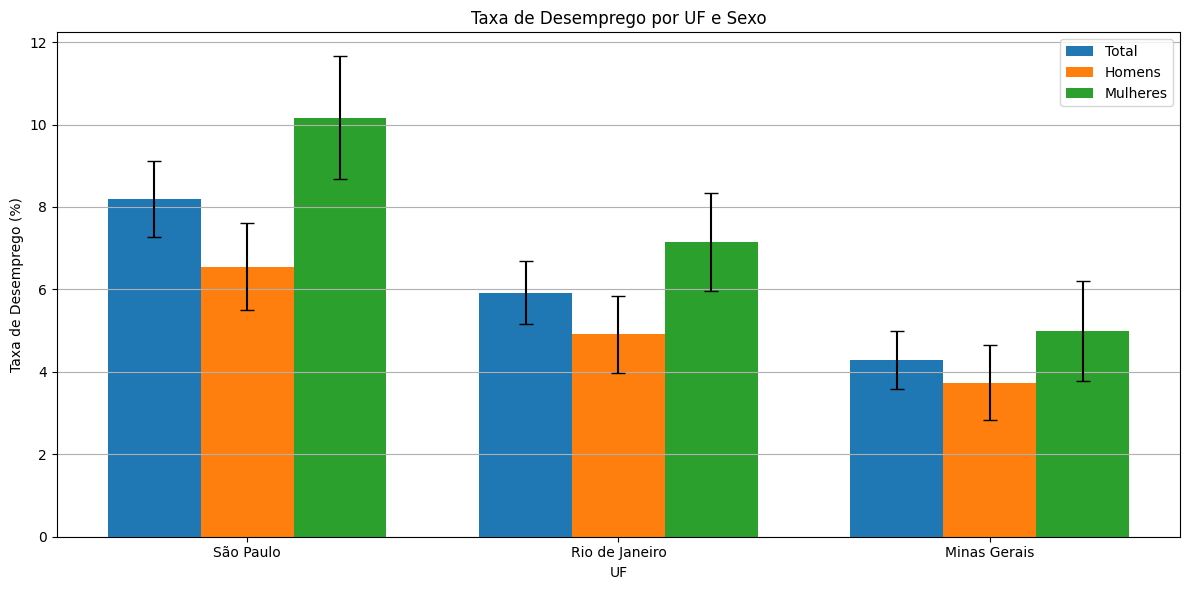

In [14]:
ufs = ['São Paulo', 'Rio de Janeiro', 'Minas Gerais']

desemprego_total = [
    descupados_sp_bootstrap*100, 
    descupados_rj_bootstrap*100, 
    descupados_mg_bootstrap*100
]

desemprego_total_intervalos = [
    (intervalo_conf_sp[0]*100, intervalo_conf_sp[1]*100),
    (intervalo_conf_rj[0]*100, intervalo_conf_rj[1]*100),
    (intervalo_conf_mg[0]*100, intervalo_conf_mg[1]*100),
]

desemprego_homens = [
    descupados_sp_bootstrap_h*100,
    descupados_rj_bootstrap_h*100,
    descupados_mg_bootstrap_h*100,
]

desemprego_homens_intervalos = [
    (intervalo_conf_sp_h[0]*100, intervalo_conf_sp_h[1]*100),
    (intervalo_conf_rj_h[0]*100, intervalo_conf_rj_h[1]*100),
    (intervalo_conf_mg_h[0]*100, intervalo_conf_mg_h[1]*100),
]

desemprego_mulheres = [
    descupados_sp_bootstrap_m*100,
    descupados_rj_bootstrap_m*100,
    descupados_mg_bootstrap_m*100,
]

desemprego_mulheres_intervalos = [
    (intervalo_conf_sp_m[0]*100, intervalo_conf_sp_m[1]*100),
    (intervalo_conf_rj_m[0]*100, intervalo_conf_rj_m[1]*100),
    (intervalo_conf_mg_m[0]*100, intervalo_conf_mg_m[1]*100),
]


largura_barra = 0.25
x = np.arange(len(ufs))

plt.figure(figsize=(12, 6))

plt.bar(x - largura_barra, desemprego_total, largura_barra, label='Total', yerr=[(upper - lower) for lower, upper in desemprego_total_intervalos], capsize=5)
plt.bar(x, desemprego_homens, largura_barra, label='Homens', yerr=[(upper - lower) for lower, upper in desemprego_homens_intervalos], capsize=5)
plt.bar(x + largura_barra, desemprego_mulheres, largura_barra, label='Mulheres', yerr=[(upper - lower) for lower, upper in desemprego_mulheres_intervalos], capsize=5)

plt.xlabel('UF')
plt.ylabel('Taxa de Desemprego (%)')
plt.title('Taxa de Desemprego por UF e Sexo')
plt.xticks(x, ufs)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Análise #2

In [15]:
# Filtrando o dataframe para os seguintes UF: SP (35), RJ (33), MG (31)

dados_filtrados = dados[dados['UF'].isin([31, 33, 35])]
dados_filtrados

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200,COD_FAM,COD_PESSOA
220591,2024,4,31,NaN,NaN,310000691,3154012,01,12,2,...,0.000000,521.305929,533.280451,0.0,534.513587,0.000000,1048.622182,0.000000,3100006910112,310000691011201
220592,2024,4,31,NaN,NaN,310000691,3154012,01,12,2,...,0.000000,521.305929,533.280451,0.0,534.513587,0.000000,1048.622182,0.000000,3100006910112,310000691011202
220593,2024,4,31,NaN,NaN,310000691,3154012,02,12,2,...,0.000000,506.630752,521.018160,0.0,539.969743,0.000000,1019.053679,0.000000,3100006910212,310000691021201
220594,2024,4,31,NaN,NaN,310000691,3154012,02,12,2,...,0.000000,506.630752,521.018160,0.0,539.969743,0.000000,1019.053679,0.000000,3100006910212,310000691021202
220595,2024,4,31,NaN,NaN,310000691,3154012,03,12,2,...,0.000000,790.151233,770.818138,0.0,795.620398,0.000000,1461.891399,0.000000,3100006910312,310000691031201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342703,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,105.146525,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121201
342704,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,105.146525,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121202
342705,2024,4,35,NaN,35.0,351541270,3521020,12,12,1,...,105.146525,102.262954,441.557318,0.0,194.761777,112.876439,314.985235,338.011380,3515412701212,351541270121203
342706,2024,4,35,NaN,35.0,351541270,3521020,13,12,1,...,96.790617,94.148000,434.673790,0.0,178.881263,99.275590,295.126315,302.600324,3515412701312,351541270131201


Média nacional de horas trabalhadas: 39.7262411463
IC 95%: (np.float64(39.66686908648096), np.float64(39.78402016290588))
         regiao      media   ci_lower   ci_upper
0         Norte  37.932490  37.728531  38.105016
1      Nordeste  37.500477  37.380368  37.640594
2       Sudeste  40.596208  40.476345  40.686927
3           Sul  40.920050  40.826628  41.056141
4  Centro-Oeste  40.610716  40.417000  40.766666


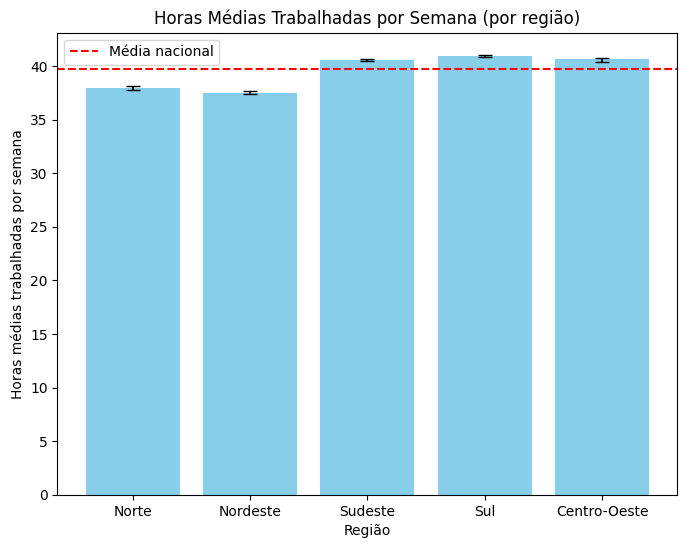

Taxa de informalidade nacional (%): 41.80181641124961
IC 95%: (np.float64(41.49359535841786), np.float64(42.07080387646853))
         regiao       prop   ci_lower   ci_upper
0         Norte  59.908149  59.275762  60.710044
1      Nordeste  56.596810  56.010049  57.181706
2       Sudeste  35.291470  34.821395  35.753060
3           Sul  32.060772  31.606493  32.596826
4  Centro-Oeste  37.181350  36.457443  37.844678


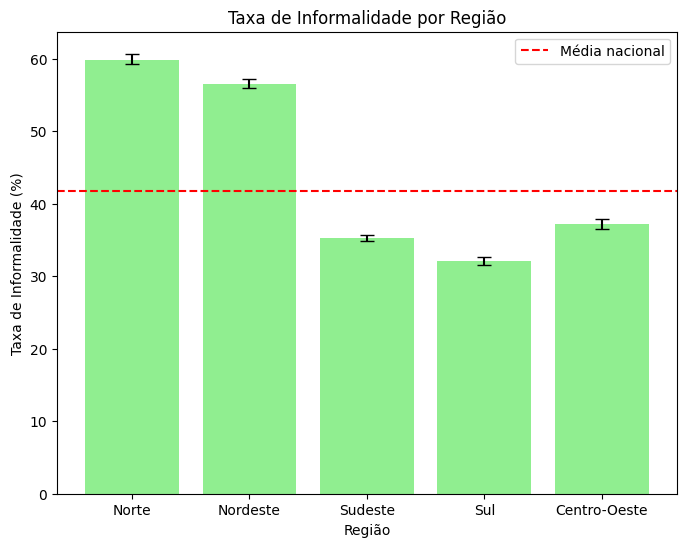

In [16]:
# ---------------------------------------------------------------------------
# Função para converter UF em região conforme IBGE
def uf_to_regiao(uf):
    if uf in [11, 12, 13, 14, 15, 16, 17]:
        return 'Norte'
    elif uf in [21, 22, 23, 24, 25, 26, 27, 28, 29]:
        return 'Nordeste'
    elif uf in [31, 32, 33, 35]:
        return 'Sudeste'
    elif uf in [41, 42, 43]:
        return 'Sul'
    elif uf in [50, 51, 52, 53]:
        return 'Centro-Oeste'
    else:
        return 'Outros'

# ---------------------------------------------------------------------------
# Função de média ponderada (para referência)
def weighted_mean(df, value_col, weight_col):
    return np.average(df[value_col], weights=df[weight_col])

# Análise 6.2.1: Horas Médias Trabalhadas por Semana (VD4031)

# Filtragem: apenas ocupados (VD4002 == 1) e horas válidas (0 < VD4031 <= 98)
df_horas = dados[(dados['VD4002'] == 1) & (dados['VD4031'] > 0) & (dados['VD4031'] <= 98)].copy()

# Criação da variável 'regiao' a partir de UF
df_horas['regiao'] = df_horas['UF'].apply(uf_to_regiao)

# Cálculo da média nacional ponderada
media_nacional, ci_nacional = bootstrap_ci(df_horas, 'VD4031', 'V1028', n_bootstrap=200, alpha=0.05)

print("Média nacional de horas trabalhadas:", media_nacional)
print("IC 95%:", ci_nacional)

# Cálculo por região
regioes = df_horas['regiao'].unique()
resultados = []

for reg in regioes:
    df_reg = df_horas[df_horas['regiao'] == reg]
    media_reg, ci_reg = bootstrap_ci(df_reg, 'VD4031', 'V1028', n_bootstrap=200, alpha=0.05)
    resultados.append({
        'regiao': reg,
        'media': media_reg,
        'ci_lower': ci_reg[0],
        'ci_upper': ci_reg[1]
    })

# Visualização dos resultados
results_df = pd.DataFrame(resultados)
print(results_df)

plt.figure(figsize=(8,6))
plt.bar(results_df['regiao'], results_df['media'], color='skyblue', 
        yerr=[results_df['media'] - results_df['ci_lower'], results_df['ci_upper'] - results_df['media']], capsize=5)
plt.axhline(y=media_nacional, color='red', linestyle='--', label='Média nacional')
plt.xlabel('Região')
plt.ylabel('Horas médias trabalhadas por semana')
plt.title('Horas Médias Trabalhadas por Semana (por região)')
plt.legend()
plt.show()

# ---------------------------------------------------------------------------
# Análise 6.2.2: Taxa de Informalidade

# Filtragem: apenas ocupados (VD4002 == 1)
df_informal = dados[dados['VD4002'] == 1].copy()

# Criação da variável 'regiao'
df_informal['regiao'] = df_informal['UF'].apply(uf_to_regiao)

# Definindo trabalhadores formais
def is_formal(row):
    # Verificação para empregados com carteira assinada ou militares/estatutários
    cond1 = (row['VD4001'] == 1) and (row['VD4002'] == 1) and (row['VD4009'] in [1, 3, 5, 7])
    # Verificação para empregador ou conta própria com CNPJ
    cond2 = (row['VD4001'] == 1) and (row['VD4002'] == 1) and (row['VD4009'] in [8, 9]) and (row['V4019'] == 1)
    return cond1 or cond2

# Criação da variável binária 'informal' (1 = informal, 0 = formal)
df_informal['informal'] = df_informal.apply(lambda r: 0 if is_formal(r) else 1, axis=1)

# Cálculo nacional: proporção ponderada de trabalhadores informais
prop_nacional, ci_nacional_inf = bootstrap_ci(df_informal, 'informal', 'V1028', n_bootstrap=200, alpha=0.05)
# Multiplicando por 100 para expressar em porcentagem
prop_nacional = prop_nacional * 100
ci_nacional_inf = (ci_nacional_inf[0] * 100, ci_nacional_inf[1] * 100)

print("Taxa de informalidade nacional (%):", prop_nacional)
print("IC 95%:", ci_nacional_inf)

# Cálculo por região
resultados_inf = []

for reg in df_informal['regiao'].unique():
    df_reg = df_informal[df_informal['regiao'] == reg]
    prop_reg, ci_reg_inf = bootstrap_ci(df_reg, 'informal', 'V1028', n_bootstrap=200, alpha=0.05)
    # Ajuste para porcentagem
    resultados_inf.append({
        'regiao': reg,
        'prop': prop_reg * 100,
        'ci_lower': ci_reg_inf[0] * 100,
        'ci_upper': ci_reg_inf[1] * 100
    })

results_inf_df = pd.DataFrame(resultados_inf)
print(results_inf_df)

plt.figure(figsize=(8,6))
plt.bar(results_inf_df['regiao'], results_inf_df['prop'], color='lightgreen', 
        yerr=[results_inf_df['prop'] - results_inf_df['ci_lower'], results_inf_df['ci_upper'] - results_inf_df['prop']], capsize=5)
plt.axhline(y=prop_nacional, color='red', linestyle='--', label='Média nacional')
plt.xlabel('Região')
plt.ylabel('Taxa de Informalidade (%)')
plt.title('Taxa de Informalidade por Região')
plt.legend()
plt.show()

# Análise #3

In [17]:
população_ocupada = dados.query('VD4002 == 1')
população_ocupada.head()

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1016,...,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200,COD_FAM,COD_PESSOA
1,2024,4,11,11.0,NaN,110000016,1110011,02,11,4,...,957.197334,0.0,778.285822,0.0,256.600053,0.0,0.0,283.755315,1100000160211,110000016021102
2,2024,4,11,11.0,NaN,110000016,1110011,03,11,4,...,764.380448,0.0,622.196312,0.0,210.777094,0.0,0.0,214.602823,1100000160311,110000016031101
3,2024,4,11,11.0,NaN,110000016,1110011,03,11,4,...,764.380448,0.0,622.196312,0.0,210.777094,0.0,0.0,214.602823,1100000160311,110000016031102
6,2024,4,11,11.0,NaN,110000016,1110011,06,11,4,...,633.505597,0.0,533.724234,0.0,178.348205,0.0,0.0,191.515711,1100000160611,110000016061101
7,2024,4,11,11.0,NaN,110000016,1110011,06,11,4,...,633.505597,0.0,533.724234,0.0,178.348205,0.0,0.0,191.515711,1100000160611,110000016061102


In [19]:
#Estados e variáveis
uf_estado = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará',
    16: 'Amapá', 17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará',
    24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas',
    28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo',
    33: 'Rio de Janeiro', 35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina',
    43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 51: 'Mato Grosso',
    52: 'Goiás', 53: 'Distrito Federal'
}

# UF por região
regioes = {
    "Nordeste": [21, 22, 23, 24, 25, 26, 27, 28, 29],
    "Sudeste": [31, 32, 33, 35],
}

# Calculando média e IC pra cada região
for regiao, ufs in regioes.items():
    df_regiao = população_ocupada[população_ocupada['UF'].isin(ufs)]
    media, ic = bootstrap_ci(df_regiao, 'VD3005', 'V1028', 200, alpha=0.05)
    print(f"Região: {regiao}")
    print(f"  Média de anos de estudo: {media:.2f}")
    print(f"  IC 95%: ({ic[0]:.2f}, {ic[1]:.2f})\n")


Região: Nordeste
  Média de anos de estudo: 10.63
  IC 95%: (10.58, 10.67)

Região: Sudeste
  Média de anos de estudo: 11.83
  IC 95%: (11.79, 11.86)



In [20]:
# Filtra homens
homens = população_ocupada.query('V2007 == 1')
media_h, ic_h = bootstrap_ci(homens, 'VD3005', 'V1028',200, alpha=0.05)

# Filtra mulheres
mulheres = população_ocupada.query('V2007 == 2')
media_m, ic_m = bootstrap_ci(mulheres, 'VD3005', 'V1028', 200, alpha=0.05)

# Print organizado
print("Análise por sexo:")
print("Homens:")
print(f"  Média de anos de estudo: {media_h:.2f}")
print(f"  IC 95%: ({ic_h[0]:.2f}, {ic_h[1]:.2f})\n")

print("Mulheres:")
print(f"  Média de anos de estudo: {media_m:.2f}")
print(f"  IC 95%: ({ic_m[0]:.2f}, {ic_m[1]:.2f})")

Análise por sexo:
Homens:
  Média de anos de estudo: 10.88
  IC 95%: (10.85, 10.92)

Mulheres:
  Média de anos de estudo: 12.12
  IC 95%: (12.08, 12.15)


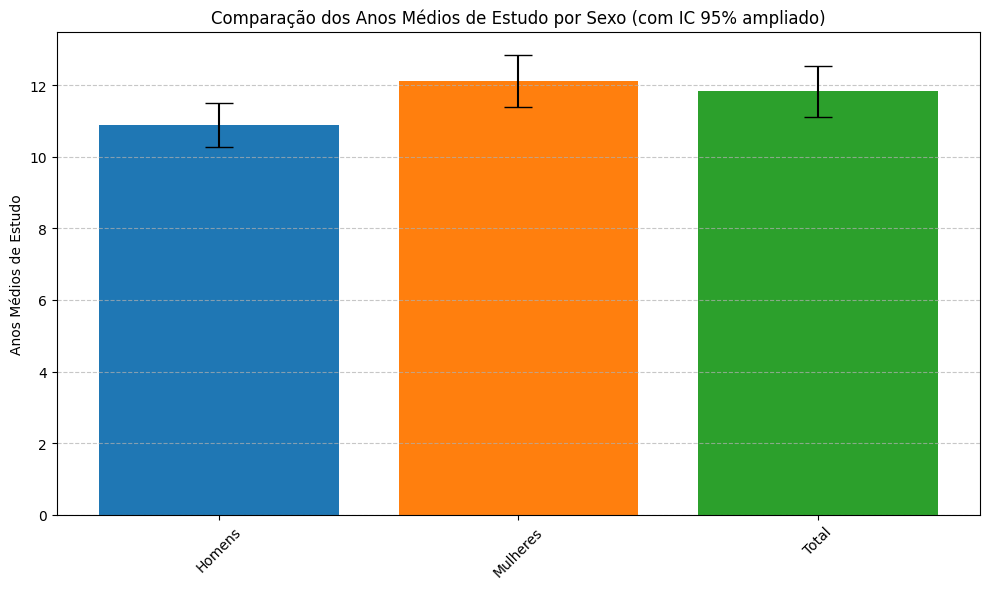

In [21]:
# Dados
grupos = ['Homens', 'Mulheres', 'Total']
medias = [media_h, media_m, media]
erros = [
    media_h - ic_h[0],
    media_m - ic_m[0],
    media - ic[0]
]

# Gráfico
fator_visual = 20
erros_amplificados = [e * fator_visual for e in erros]

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(grupos, medias, yerr=erros_amplificados, capsize=10, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Anos Médios de Estudo')
plt.title('Comparação dos Anos Médios de Estudo por Sexo (com IC 95% ampliado)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
jovens = dados.query('V2009>= 18 and V2009<=29')

In [23]:
jovens = dados.query('V2009 >= 18 and V2009 <= 29').copy()

jovens['estuda'] = (jovens['V3002'] == 1).astype(int)
jovens['trabalha'] = (jovens['VD4002'] == 1).astype(int)
jovens['nem_nem'] = ((jovens['estuda'] == 0) & (jovens['trabalha'] == 0)).astype(int)

regioes = {
    "Nordeste": [21, 22, 23, 24, 25, 26, 27, 28, 29],
    "Sudeste": [31, 32, 33, 35],
}

def pegar_regiao(uf):
    for regiao, ufs in regioes.items():
        if uf in ufs:
            return regiao
    return 'Outras Regiões'

jovens['regiao'] = jovens['UF'].apply(pegar_regiao)

# 4. Calcular proporção nem-nem com intervalo de confiança (IC)
resultados = []

for regiao in jovens['regiao'].unique():
    grupo = jovens[jovens['regiao'] == regiao]
    proporcao, ic = bootstrap_ci(grupo, 'nem_nem', 'V1028', 200)
    resultados.append({
        'Região': regiao,
        'Proporção (%)': proporcao * 100,
        'IC Inferior (%)': ic[0] * 100,
        'IC Superior (%)': ic[1] * 100
    })

df_resultados = pd.DataFrame(resultados).sort_values(by='Região')
print(df_resultados)

           Região  Proporção (%)  IC Inferior (%)  IC Superior (%)
1        Nordeste      32.141765        31.506997        32.913274
0  Outras Regiões      20.748171        20.222482        21.287824
2         Sudeste      19.280256        18.558221        20.071456


In [24]:
# Separar jovens homens e mulheres
homens = jovens[jovens['V2007'] == 1]
mulheres = jovens[jovens['V2007'] == 2]

# Calcular proporção e IC com bootstrap
proporcao_h, ic_h = bootstrap_ci(homens, 'nem_nem', 'V1028', 200)
proporcao_m, ic_m = bootstrap_ci(mulheres, 'nem_nem', 'V1028', 200)

# Organizar resultado em DataFrame
sexo_resultados = pd.DataFrame({
    'Sexo': ['Homens', 'Mulheres'],
    'Proporção (%)': [proporcao_h * 100, proporcao_m * 100],
    'IC Inferior (%)': [ic_h[0] * 100, ic_m[0] * 100],
    'IC Superior (%)': [ic_h[1] * 100, ic_m[1] * 100]
})

print(sexo_resultados)

       Sexo  Proporção (%)  IC Inferior (%)  IC Superior (%)
0    Homens      15.365373        14.892647        15.811371
1  Mulheres      31.404464        30.708644        32.044165


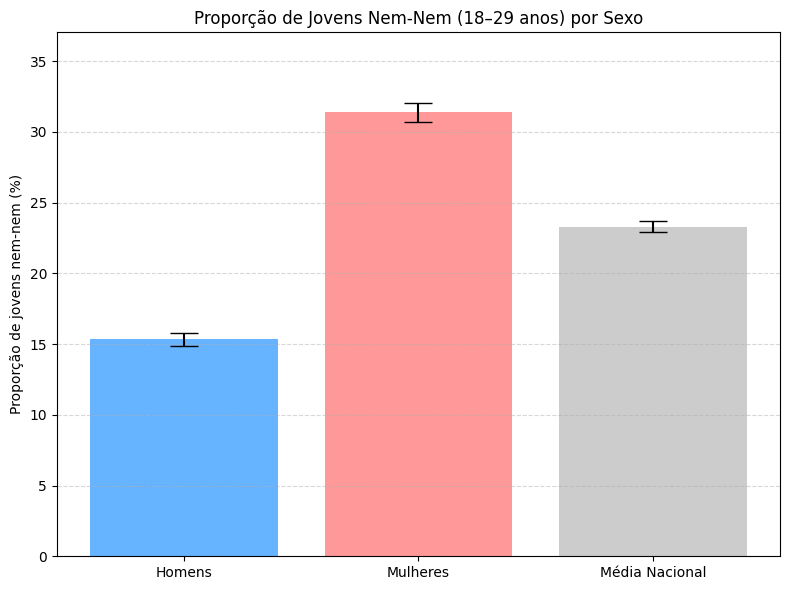

In [25]:
# Calcular média nacional
proporcao_nacional, ic_nacional = bootstrap_ci(jovens, 'nem_nem', 'V1028', 200)

# Adiciona média nacional ao DataFrame
sexo_resultados_nacional = sexo_resultados.copy()
sexo_resultados_nacional.loc[len(sexo_resultados_nacional)] = {
    'Sexo': 'Média Nacional',
    'Proporção (%)': proporcao_nacional * 100,
    'IC Inferior (%)': ic_nacional[0] * 100,
    'IC Superior (%)': ic_nacional[1] * 100
}

# Valores pro gráfico
x_labels = sexo_resultados_nacional['Sexo']
y_values = sexo_resultados_nacional['Proporção (%)']
yerr = [
    sexo_resultados_nacional['Proporção (%)'] - sexo_resultados_nacional['IC Inferior (%)'],
    sexo_resultados_nacional['IC Superior (%)'] - sexo_resultados_nacional['Proporção (%)']
]

# Gráfico de barras com erro
plt.figure(figsize=(8, 6))
plt.bar(x_labels, y_values, yerr=yerr, capsize=10, color=['#66b3ff', '#ff9999', '#cccccc'])
plt.ylabel('Proporção de jovens nem-nem (%)')
plt.title('Proporção de Jovens Nem-Nem (18–29 anos) por Sexo')
plt.ylim(0, max(sexo_resultados_nacional['IC Superior (%)']) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


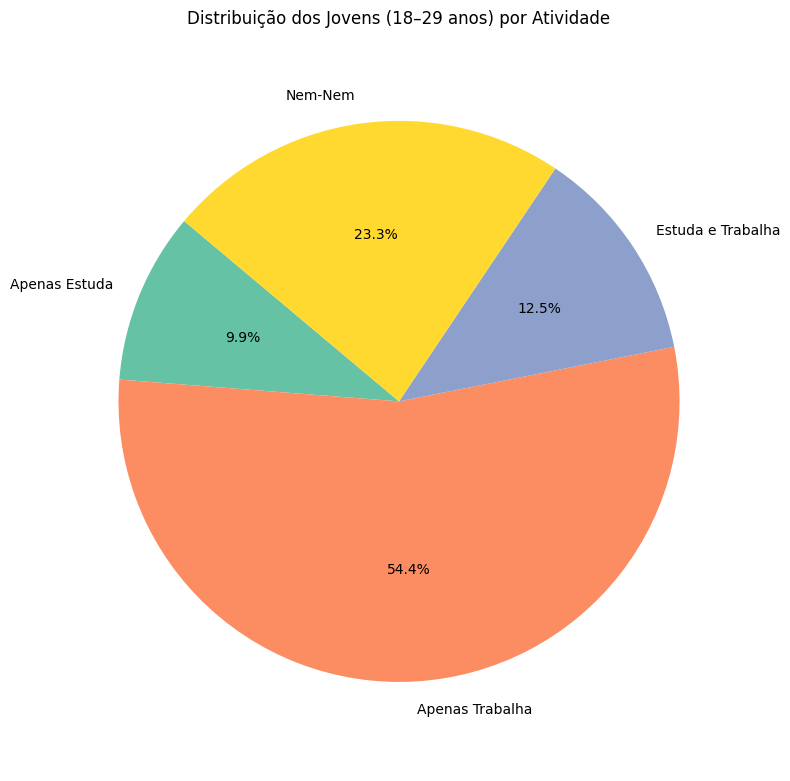

In [26]:
# Classificação com base em colunas já existentes
jovens['categoria'] = jovens.apply(lambda row: 
    'Apenas Estuda' if row['estuda'] == 1 and row['trabalha'] == 0 else
    'Apenas Trabalha' if row['estuda'] == 0 and row['trabalha'] == 1 else
    'Estuda e Trabalha' if row['estuda'] == 1 and row['trabalha'] == 1 else
    'Nem-Nem', axis=1)

# Agrupa e calcula proporção ponderada
proporcoes = jovens.groupby('categoria')['V1028'].sum() / jovens['V1028'].sum()
proporcoes *= 100  # porcentagem

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(proporcoes.values, labels=proporcoes.index, autopct='%1.1f%%',
        startangle=140, colors=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])
plt.title('Distribuição dos Jovens (18–29 anos) por Atividade')
plt.axis('equal')  # Formato redondinho
plt.tight_layout()
plt.show()

# Análise #4

In [9]:
# 1. Identificação das variáveis relevantes e Cálculo da Renda Per Capita (conforme instruções)

# Certificar que as colunas UPA, V1008, V1014 são do tipo string para concatenação
dados['UPA'] = dados['UPA'].astype(str)
dados['V1008'] = dados['V1008'].astype(str)
dados['V1014'] = dados['V1014'].astype(str)

# Criar a variável 'id_domicilio'
dados['id_domicilio'] = dados['UPA'] + dados['V1008'] + dados['V1014']

# Agrupar por 'id_domicilio' para calcular a renda total e o número de moradores
domicilio_agg = dados.groupby('id_domicilio').agg(
    # Usando VD4019 conforme instruído, mas com ressalvas.
    renda_total_domicilio=('VD4019', 'sum'),
    num_moradores=('id_domicilio', 'size')
)

# Calcular a renda per capita por domicílio
domicilio_agg['renda_per_capita_calculada'] = np.where(
    domicilio_agg['num_moradores'] > 0,
    domicilio_agg['renda_total_domicilio'] / domicilio_agg['num_moradores'],
    0
)

# Juntar a renda per capita calculada de volta ao dataframe original de pessoas
dados = dados.merge(
    domicilio_agg[['renda_per_capita_calculada']],
    on='id_domicilio',
    how='left'
)

# Calcular a média ponderada da renda per capita calculada
# Remover NaNs que podem surgir de merge ou na coluna de peso antes de calcular a média
dados_validos = dados.dropna(subset=['renda_per_capita_calculada', 'V1028'])
renda_media_per_capita_ponderada = np.average(
    dados_validos['renda_per_capita_calculada'],
    weights=dados_validos['V1028']
)

print(f"Renda Média Per Capita Ponderada: R$ {renda_media_per_capita_ponderada:.2f}")

# Exibir algumas colunas relevantes para verificação
print("\nDataFrame com a coluna 'renda_per_capita_calculada':")
print(dados[['UF', 'id_domicilio', 'VD4019', 'V1028', 'renda_per_capita_calculada']])

Renda Média Per Capita Ponderada: R$ 1560.60

DataFrame com a coluna 'renda_per_capita_calculada':
        UF   id_domicilio  VD4019       V1028  renda_per_capita_calculada
0       11  1100000160211     NaN  247.706465                  706.000000
1       11  1100000160211  1412.0  247.706465                  706.000000
2       11  1100000160311  1412.0  195.875282                  853.000000
3       11  1100000160311  2000.0  195.875282                  853.000000
4       11  1100000160311     NaN  195.875282                  853.000000
...     ..            ...     ...         ...                         ...
469329  53  5300641231212  2100.0  277.663471                 1966.666667
469330  53  5300641231212  2000.0  277.663471                 1966.666667
469331  53  5300641231212  1800.0  277.663471                 1966.666667
469332  53  5300641231412     NaN  206.195599                    0.000000
469333  53  5300641231412     NaN  206.195599                    0.000000

[469334 rows

In [10]:
# 2. Definição da linha de pobreza

# Salário mínimo vigente no 4º trimestre de 2024 (vigente desde 01/01/2024)
salario_minimo_2024 = 1412.00

# Definir a linha de pobreza como meio salário mínimo
linha_pobreza = salario_minimo_2024 / 2

print(f"Salário Mínimo (4º Tri 2024): R$ {salario_minimo_2024:.2f}")
print(f"Linha de Pobreza (1/2 SM): R$ {linha_pobreza:.2f}")

dados['pobre'] = np.where(dados['VD4019'] < linha_pobreza, 1, 0)

# Verificar a criação da coluna e os primeiros valores
print("\nDataFrame com a coluna 'pobre':")
print(dados[['UF', 'VD4019', 'pobre']])

# Verificar a contagem de pobres e não pobres (incluindo NaNs em VD4019 que resultaram em 'pobre'=0)
print("\nContagem inicial na coluna 'pobre':")
print(dados['pobre'].value_counts(dropna=False))

Salário Mínimo (4º Tri 2024): R$ 1412.00
Linha de Pobreza (1/2 SM): R$ 706.00

DataFrame com a coluna 'pobre':
        UF  VD4019  pobre
0       11     NaN      0
1       11  1412.0      0
2       11  1412.0      0
3       11  2000.0      0
4       11     NaN      0
...     ..     ...    ...
469329  53  2100.0      0
469330  53  2000.0      0
469331  53  1800.0      0
469332  53     NaN      0
469333  53     NaN      0

[469334 rows x 3 columns]

Contagem inicial na coluna 'pobre':
pobre
0    444157
1     25177
Name: count, dtype: int64


In [11]:
# 3. Cálculo da proporção para suas regiões

# Filtrar dados para remover NaNs em VD4019 (que afeta 'pobre') e V1028 (peso)
# Pessoas com VD4019 NaN não podem ser classificadas como pobres/não pobres
dados_validos_pobreza = dados.dropna(subset=['VD4019', 'V1028'])

# Verificar o número de observações válidas
print(f"Número de observações válidas para análise de pobreza: {len(dados_validos_pobreza)}")

# Calcular a proporção ponderada e o IC de 95% usando bootstrap
proporcao_pobreza, ic_pobreza = bootstrap_ci(
    df=dados_validos_pobreza,
    col='pobre',
    weight_col='V1028',
    n_bootstrap=200,  # Número de réplicas bootstrap (pode ajustar se necessário)
    alpha=0.05         # Para IC de 95%
)

# Expressar como percentagem
proporcao_pobreza_perc = proporcao_pobreza * 100
ic_pobreza_perc = (ic_pobreza[0] * 100, ic_pobreza[1] * 100)

print(f"\nProporção Ponderada de Pessoas Abaixo da Linha de Pobreza: {proporcao_pobreza_perc:.2f}%")
print(f"Intervalo de Confiança de 95% (Bootstrap): ({ic_pobreza_perc[0]:.2f}%, {ic_pobreza_perc[1]:.2f}%)")

Número de observações válidas para análise de pobreza: 204334

Proporção Ponderada de Pessoas Abaixo da Linha de Pobreza: 9.54%
Intervalo de Confiança de 95% (Bootstrap): (9.40%, 9.68%)


In [12]:
# 4. Cálculo da proporção por UF

ufs = dados_validos_pobreza['UF'].unique()
ufs.sort() # Ordenar UFs para melhor visualização

resultados_uf = []

print("\nCalculando proporção de pobreza por UF (pode levar alguns minutos)...")

for uf in ufs:
    dados_uf = dados_validos_pobreza[dados_validos_pobreza['UF'] == uf]

    # Verificar se há dados suficientes na UF para calcular
    if len(dados_uf) > 1: # Precisa de mais de 1 obs para bootstrap razoável
        proporcao_uf, ic_uf = bootstrap_ci(
            df=dados_uf,
            col='pobre',
            weight_col='V1028',
            n_bootstrap=200, 
            alpha=0.05
        )
        resultados_uf.append({
            'UF': uf,
            'Proporcao_Pobreza (%)': proporcao_uf * 100,
            'IC_Inferior (%)': ic_uf[0] * 100,
            'IC_Superior (%)': ic_uf[1] * 100
        })
    else:
         resultados_uf.append({
            'UF': uf,
            'Proporcao_Pobreza (%)': np.nan,
            'IC_Inferior (%)': np.nan,
            'IC_Superior (%)': np.nan
        })

# Criar DataFrame com os resultados
resultados_uf_df = pd.DataFrame(resultados_uf)

# Exibir os resultados formatados
print("\nProporção de Pessoas Abaixo da Linha de Pobreza por UF (com IC 95%):")
# Formatar colunas numéricas para melhor leitura
pd.set_option('display.float_format', '{:.2f}'.format)
print(resultados_uf_df.round(2))


Calculando proporção de pobreza por UF (pode levar alguns minutos)...

Proporção de Pessoas Abaixo da Linha de Pobreza por UF (com IC 95%):
    UF  Proporcao_Pobreza (%)  IC_Inferior (%)  IC_Superior (%)
0   11                   7.15             6.02             8.30
1   12                  13.41            12.18            14.67
2   13                  15.56            14.60            16.63
3   14                  10.52             9.23            11.68
4   15                  18.89            17.79            19.86
5   16                   8.75             7.33            10.33
6   17                   9.99             8.98            11.06
7   21                  23.39            22.51            24.38
8   22                  25.25            23.79            26.90
9   23                  22.74            21.69            23.68
10  24                  17.06            15.39            18.60
11  25                  20.51            19.41            21.76
12  26                  20.

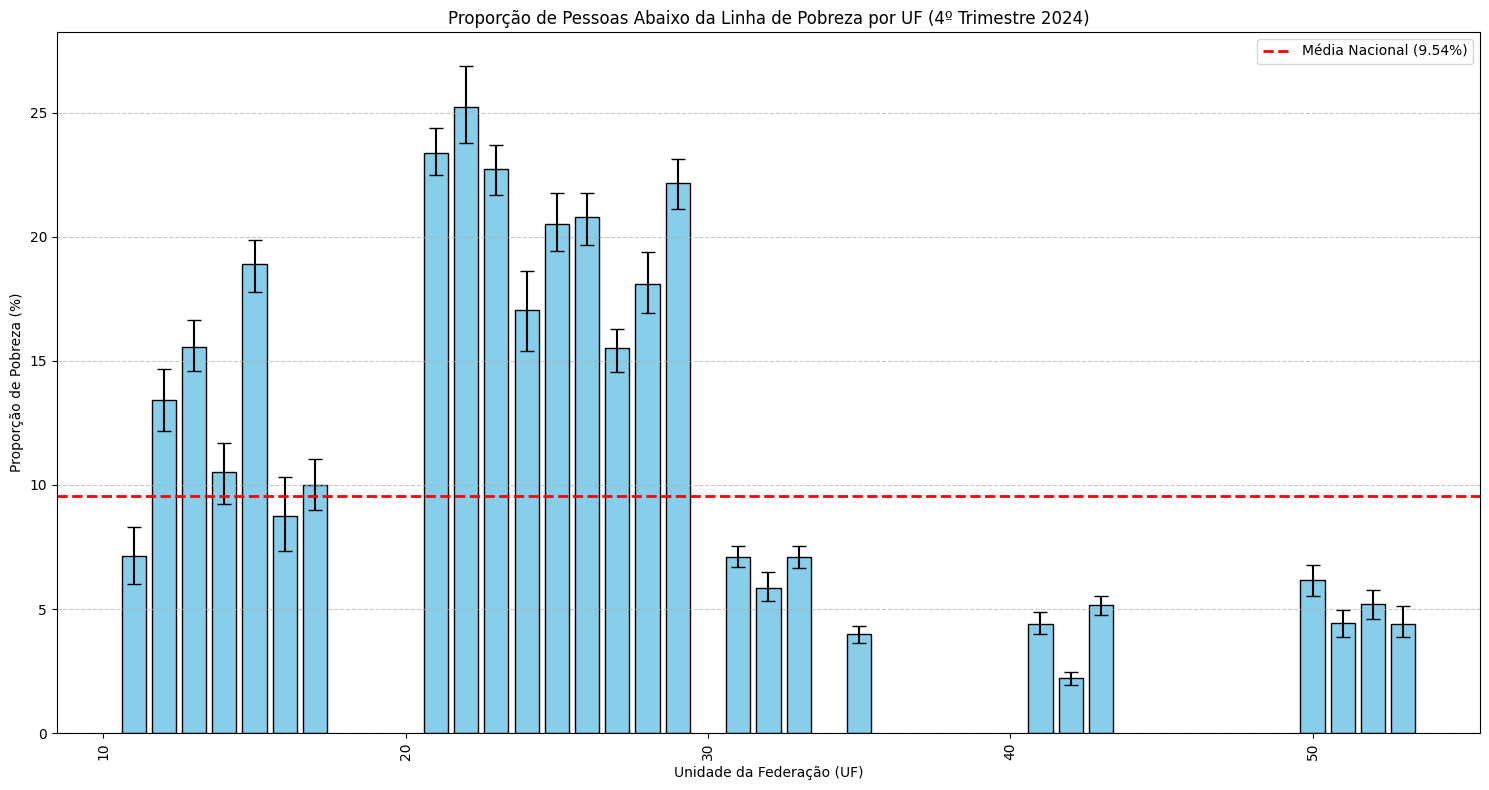

In [14]:
import matplotlib.pyplot as plt

# 5. Visualização dos resultados

# Ordenar o DataFrame pela proporção de pobreza (decrescente)
resultados_uf_df_sorted = resultados_uf_df.sort_values('Proporcao_Pobreza (%)', ascending=False)

# Calcular o tamanho do erro para as barras (metade da largura do IC)
# IC = [IC_Inferior, IC_Superior]
# Ponto central = Proporcao_Pobreza
# Erro para cima = IC_Superior - Proporcao_Pobreza
# Erro para baixo = Proporcao_Pobreza - IC_Inferior
# Usaremos um formato que o `yerr` do matplotlib entende: [erro_abaixo, erro_acima]
erro_inferior = resultados_uf_df_sorted['Proporcao_Pobreza (%)'] - resultados_uf_df_sorted['IC_Inferior (%)']
erro_superior = resultados_uf_df_sorted['IC_Superior (%)'] - resultados_uf_df_sorted['Proporcao_Pobreza (%)']
erros_ic = [erro_inferior.to_numpy(), erro_superior.to_numpy()] # Precisa ser array para yerr

# Criar o gráfico de barras
plt.figure(figsize=(15, 8)) # Ajustar tamanho para melhor visualização
bars = plt.bar(
    resultados_uf_df_sorted['UF'],
    resultados_uf_df_sorted['Proporcao_Pobreza (%)'],
    yerr=erros_ic,
    capsize=5, # Adiciona 'caps' às barras de erro
    color='skyblue',
    edgecolor='black'
)

# Adicionar linha horizontal para a média nacional (calculada na etapa 3)
plt.axhline(
    y=proporcao_pobreza_perc,
    color='r',
    linestyle='--',
    linewidth=2,
    label=f'Média Nacional ({proporcao_pobreza_perc:.2f}%)'
)

# Melhorar a visualização
plt.xlabel('Unidade da Federação (UF)')
plt.ylabel('Proporção de Pobreza (%)')
plt.title('Proporção de Pessoas Abaixo da Linha de Pobreza por UF (4º Trimestre 2024)')
plt.xticks(rotation=90) # Rotacionar labels do eixo X para evitar sobreposição
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajustar layout para não cortar labels

# Exibir o gráfico
plt.show()